<a href="https://colab.research.google.com/github/jjswan/2022-last-project/blob/main/5_6%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

프로젝트 주제: 외국인의 한국 관광 실태 조사  
-한국을 방문하게 된 요인  
-한국에서 방문한 지역  
-한국 관광에서 주로 한 활동  
-좀 더 많은 지역을 관광하도록 이끌기 위해 해야할 일(결론 이끌어내기)  

-깃허브 링크: https://github.com/jjswan?tab=repositories


In [42]:
!git clone https://github.com/jjswan/data

Cloning into 'data'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), done.


In [43]:
ls

 고려요인1순위.csv  '주요참여활동(방문횟수).csv'   README.md
 방문지역.csv        data/


In [44]:
cd data

/content/data/data/data


In [45]:
ls

 고려요인1순위.csv   방문지역.csv  '주요참여활동(방문횟수).csv'   README.md


In [46]:
#데이터 업로드 및 한글폰트 설치 코딩
#from google.colab import files
#files.upload()


import matplotlib as plt
!apt-get install fonts-nanum -qq > /dev/null # 한글폰트설치
!fc-cache -fv
import matplotlib as mpl
mpl.font_manager._rebuild()
findfont = mpl.font_manager.fontManager.findfont
mpl.font_manager.findfont = findfont
mpl.backends.backend_agg.findfont = findfont
plt.rc('font', family = 'NanumGothic')

plt.rcParams['axes.unicode_minus'] = False

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


2015년부터 2019년까지 외국인의 국내를 방문하는 데 고려한 1순위 요인 데이터입니다.
코로나19 유행 확산을 이유로 2020년부터의 데이터는 반영하지 않았습니다.
모든 해에 포함된 요인만 데이터로 산출하였습니다


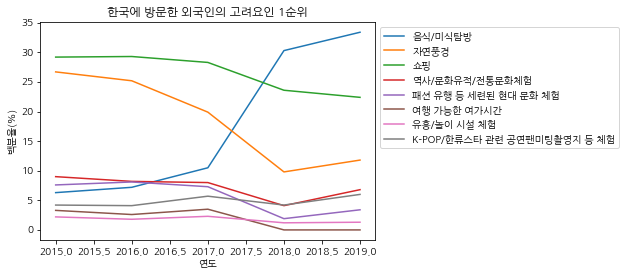

In [47]:
import csv
import matplotlib.pyplot as plt
import numpy as np

data1 = csv.reader(open('고려요인1순위.csv', encoding = 'cp949'))
next(data1)

#각 데이터에서 겹치는선호 요인이 8개니까 선호도 리스트 안에 8개 빈 리스트 만들기 

year = []
preference = []
reason = ['음식/미식탐방','자연풍경', '쇼핑', '역사/문화유적/전통문화체험', '패션 유행 등 세련된 현대 문화 체험', '여행 가능한 여가시간', '유흥/놀이 시설 체험', 'K-POP/한류스타 관련 공연팬미팅촬영지 등 체험']

#연도 생성(2015-2019년)
for i in range(8):
  preference.append([])

for i in range(2015, 2020):
  year.append(i)

#8개 빈 리스트 안에 요인별 백분율 넣기. 
for row in data1:
  for i in range(8):
    preference[i].append(float(row[i+3]))

#안내 멘트
print('2015년부터 2019년까지 외국인의 국내를 방문하는 데 고려한 1순위 요인 데이터입니다.')
print('코로나19 유행 확산을 이유로 2020년부터의 데이터는 반영하지 않았습니다.')
print('모든 해에 포함된 요인만 데이터로 산출하였습니다')


#리스트를 plot으로 나타내기

for i in range(8):
  plt.plot(year, preference[i], label = reason[i])
plt.title('한국에 방문한 외국인의 고려요인 1순위')
plt.xlabel('연도')
plt.ylabel('백분율(%)')
plt.legend(bbox_to_anchor=(1,1))
plt.show()



2015년부터 2019년까지 외국인의 국내를 방문하는 데 고려한 1순위 요인 데이터입니다.
코로나19 유행 확산을 이유로 2020년부터의 데이터는 반영하지 않았습니다.
모든 해에 포함된 요인만 데이터로 산출하였습니다


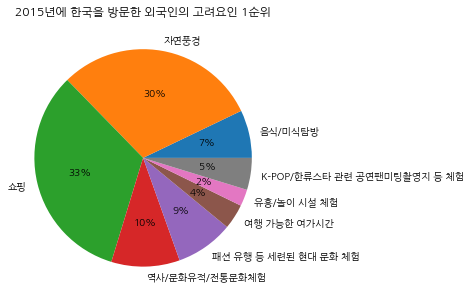

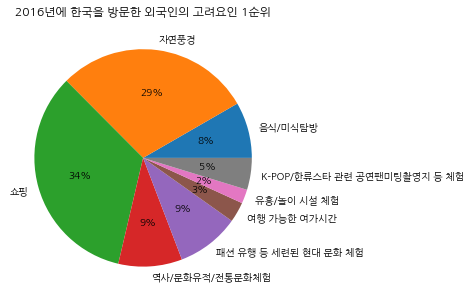

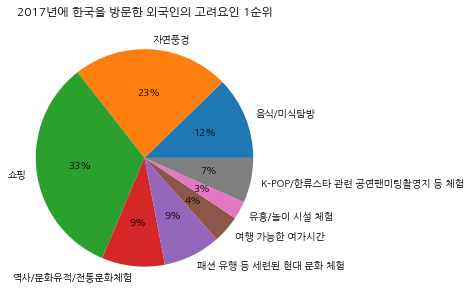

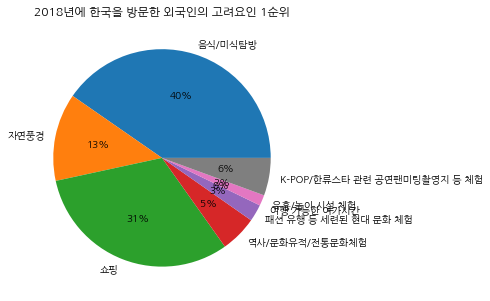

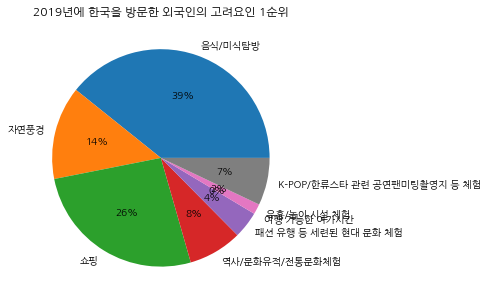

In [48]:
#고려1순위를 파이 차트로 나타내기
import csv
import matplotlib.pyplot as plt
import numpy as np

data1 = csv.reader(open('고려요인1순위.csv', encoding = 'cp949'))
next(data1)

#안내 멘트
print('2015년부터 2019년까지 외국인의 국내를 방문하는 데 고려한 1순위 요인 데이터입니다.')
print('코로나19 유행 확산을 이유로 2020년부터의 데이터는 반영하지 않았습니다.')
print('모든 해에 포함된 요인만 데이터로 산출하였습니다')

#data의 각 row를 리스트로 만들기
year = []

for i in range(2015, 2020):
  year.append(i)

new = []
for row in data1:
  new_list= row[3:]
  new.append(new_list)

reason = ['음식/미식탐방','자연풍경', '쇼핑', '역사/문화유적/전통문화체험', '패션 유행 등 세련된 현대 문화 체험', '여행 가능한 여가시간', '유흥/놀이 시설 체험', 'K-POP/한류스타 관련 공연팬미팅촬영지 등 체험']
i = 0

for item in new:
  fig = plt.figure(figsize = (5, 5))
  plt.pie(item, labels = reason, autopct='%.0f%%')
  plt.title('{year}년에 한국을 방문한 외국인의 고려요인 1순위'.format(year = year[i]))
  plt.show()
  i+=1



[[78.7, 78.0, 78.8, 79.4, 76.4], [13.3, 13.1, 15.6, 14.9, 14.9], [6.8, 5.0, 10.0, 8.3, 8.0], [6.4, 6.4, 6.8, 9.7, 7.8], [1.2, 1.0, 1.7, 1.7, 1.5], [0.6, 0.4, 0.9, 0.9, 1.1], [1.3, 1.0, 1.3, 1.4, 1.4], [0.2, 0.2, 0.4, 0.4, 0.4], [2.5, 2.0, 2.6, 2.8, 3.1], [3.2, 1.9, 2.2, 2.3, 1.7], [1.6, 1.2, 2.5, 3.1, 3.5], [1.0, 0.6, 1.4, 1.2, 1.0], [10.3, 10.4, 15.1, 14.7, 14.1], [0.8, 0.5, 1.2, 1.1, 1.1], [1.7, 1.3, 1.5, 1.1, 1.7], [1.8, 0.9, 0.7, 0.7, 0.8], [18.3, 20.2, 10.8, 8.5, 9.9], [0.1, 0.0, 0.2, 0.0, 0.0]]
2015년부터 2019년까지 외국인의 방문지역 데이터입니다.
코로나19 유행 확산을 이유로 2020년부터의 데이터는 반영하지 않았습니다.
모든 해에 포함된 지역만 데이터로 산출하였습니다


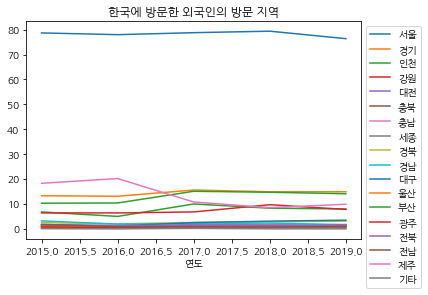

In [49]:
#외국인의 방문 지역 나타내기
import csv
import matplotlib.pyplot as plt
import numpy as np

data2 = csv.reader(open('방문지역.csv', encoding = 'cp949'))
next(data2)

year = []
for i in range(2015, 2020):
  year.append(i)

#18개 지역을 빈 리스트로 만들기
name = ['서울', '경기', '인천', '강원', '대전', '충북', '충남', '세종', '경북', '경남', '대구', '울산', '부산', '광주', '전북', '전남', '제주', '기타']

region = []
for i in range(18):
  region.append([])

for row in data2:
  for i in range(len(row)-1):
    region[i].append(float(row[i+1]))
print(region)

#안내 멘트
print('2015년부터 2019년까지 외국인의 방문지역 데이터입니다.')
print('코로나19 유행 확산을 이유로 2020년부터의 데이터는 반영하지 않았습니다.')
print('모든 해에 포함된 지역만 데이터로 산출하였습니다')

#리스트를 plot으로 나타내기

for i in range(18):
  plt.plot(year, region[i], label = name[i])

plt.title('한국에 방문한 외국인의 방문 지역')
plt.xlabel('연도')
plt.legend(bbox_to_anchor=(1,1))
plt.show()




[[13.3, 13.1, 15.6, 14.9, 14.9], [6.8, 5.0, 10.0, 8.3, 8.0], [6.4, 6.4, 6.8, 9.7, 7.8], [1.2, 1.0, 1.7, 1.7, 1.5], [0.6, 0.4, 0.9, 0.9, 1.1], [1.3, 1.0, 1.3, 1.4, 1.4], [0.2, 0.2, 0.4, 0.4, 0.4], [2.5, 2.0, 2.6, 2.8, 3.1], [3.2, 1.9, 2.2, 2.3, 1.7], [1.6, 1.2, 2.5, 3.1, 3.5], [1.0, 0.6, 1.4, 1.2, 1.0], [10.3, 10.4, 15.1, 14.7, 14.1], [0.8, 0.5, 1.2, 1.1, 1.1], [1.7, 1.3, 1.5, 1.1, 1.7], [1.8, 0.9, 0.7, 0.7, 0.8], [18.3, 20.2, 10.8, 8.5, 9.9], [0.1, 0.0, 0.2, 0.0, 0.0]]
2015년부터 2019년까지 외국인의 방문지역 데이터입니다.
코로나19 유행 확산을 이유로 2020년부터의 데이터는 반영하지 않았습니다.
압도적인 1순위 "서울"은 제외한 데이터입니다.


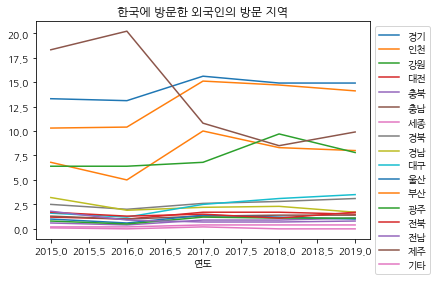

In [50]:
#서울을 제외한 방문 지역 나타내기
import csv
import matplotlib.pyplot as plt
import numpy as np

data2 = csv.reader(open('방문지역.csv', encoding = 'cp949'))
next(data2)

year = []
for i in range(2015, 2020):
  year.append(i)

#18개 지역을 빈 리스트로 만들기
name = ['경기', '인천', '강원', '대전', '충북', '충남', '세종', '경북', '경남', '대구', '울산', '부산', '광주', '전북', '전남', '제주', '기타']

region = []
for i in range(17):
  region.append([])

for row in data2:
  for i in range(len(row)-2):
    region[i].append(float(row[i+2]))
print(region)

#안내 멘트
print('2015년부터 2019년까지 외국인의 방문지역 데이터입니다.')
print('코로나19 유행 확산을 이유로 2020년부터의 데이터는 반영하지 않았습니다.')
print('압도적인 1순위 "서울"은 제외한 데이터입니다.')

#리스트를 plot으로 나타내기

for i in range(17):
  plt.plot(year, region[i], label = name[i])

plt.title('한국에 방문한 외국인의 방문 지역')
plt.xlabel('연도')
plt.legend(bbox_to_anchor=(1,1))
plt.show()


In [51]:
#주요 참여활동 나타내기
#주요 참여활동 종류와 방한횟수 사이의 관계 구하기
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data3 = csv.reader(open('주요참여활동(방문횟수).csv', encoding = 'cp949'))
next(data3)
#방한 횟수별로 가장 많은 주요 참여활동 10위까지만 나타내기

years = []
act = []
list_1 = []
topact = []
toplist_1=[]


for i in range(5):
  years.append([])
  act.append([])
  list_1.append([])
  topact.append([])
  toplist_1.append([])
  
k = 0
j = 0
for row in data3:
  
  if row[0] == '활동':
    for i in range(1, 25):
      if row[i] == '':
        act[k].append('none')
      else:
        act[k].append(row[i])
    k+=1
  elif row[0] == '1회':
    for i in range(1, 25):
      if row[i] == '':
        list_1[j].append(0)
      else:
        list_1[j].append(float(row[i]))
    
    j += 1


for i in range(5):
  
  zipped = zip(list_1[i], act[i])
  new = list(zipped)
  new = sorted(new, reverse = True)
  new = new[:10]
  for j in range(10):
    topact[i].append(new[j][0])
    toplist_1[i].append(new[j][1])

  print('{}년에 한국을 1회 방문한 외국인들의 주요활동 TOP10입니다.'.format(int(2015+i)))
  print('활동선택량은 단위가 분명치 않으므로 상대적 비교 자료로만 이용하기시 바랍니다.\n')
  
  data = {'활동종류': toplist_1[i], '활동선택량': topact[i]     
  }
  df = pd.DataFrame(data, index = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
  display(df)
  print('\n')


2015년에 한국을 1회 방문한 외국인들의 주요활동 TOP10입니다.
활동선택량은 단위가 분명치 않으므로 상대적 비교 자료로만 이용하기시 바랍니다.



,활동종류,활동선택량
1,쇼핑,73.9
2,식도락 관광,45.5
3,자연경관 감상,37.7
4,고궁/역사유적지방문,32.6
5,박물관 전시관 관람,14.2
6,유흥/오락,11.8
7,테마파크,9.7
8,업무수행,7.9
9,시티투어 버스 이용,7.6
10,휴양 휴식,7.0




2016년에 한국을 1회 방문한 외국인들의 주요활동 TOP10입니다.
활동선택량은 단위가 분명치 않으므로 상대적 비교 자료로만 이용하기시 바랍니다.



,활동종류,활동선택량
1,쇼핑,76.9
2,식도락 관광,49.3
3,자연경관 감상,33.5
4,고궁/역사유적지방문,30.2
5,유흥/오락,16.9
6,박물관 전시관 관람,13.8
7,테마파크,12.3
8,공연 민속행사 축제참가 및 관람,8.0
9,휴양 휴식,7.2
10,업무수행,6.2




2017년에 한국을 1회 방문한 외국인들의 주요활동 TOP10입니다.
활동선택량은 단위가 분명치 않으므로 상대적 비교 자료로만 이용하기시 바랍니다.



,활동종류,활동선택량
1,쇼핑,69.9
2,식도락 관광,53.0
3,자연경관 감상,32.2
4,고궁/역사유적지방문,31.5
5,유흥/오락,15.1
6,박물관 전시관 관람,10.5
7,업무수행,9.5
8,테마파크,9.3
9,휴양 휴식,8.8
10,전통문화체험,7.8




2018년에 한국을 1회 방문한 외국인들의 주요활동 TOP10입니다.
활동선택량은 단위가 분명치 않으므로 상대적 비교 자료로만 이용하기시 바랍니다.



,활동종류,활동선택량
1,쇼핑,94.6
2,식도락 관광,69.1
3,자연경관 감상,63.8
4,고궁/역사유적지방문,57.9
5,박물관 전시관 관람,28.9
6,전통문화체험,24.2
7,테마파크,22.9
8,휴양 휴식,17.0
9,유흥/오락,16.3
10,공연 민속행사 축제참가 및 관람,14.6




2019년에 한국을 1회 방문한 외국인들의 주요활동 TOP10입니다.
활동선택량은 단위가 분명치 않으므로 상대적 비교 자료로만 이용하기시 바랍니다.



,활동종류,활동선택량
1,쇼핑,94.8
2,식도락 관광,75.2
3,자연경관 감상,69.2
4,고궁/역사유적지방문,60.8
5,전통문화체험,33.9
6,박물관 전시관 관람,32.3
7,유흥/오락,24.6
8,K-POP/한류스타 관련 공연장 방문,17.6
9,업무수행,11.5
10,뷰티/의료관광,9.1


In [52]:
#주요 참여활동 나타내기
#주요 참여활동 종류와 방한횟수 사이의 관계 구하기
import csv
import matplotlib.pyplot as plt
import numpy as np

data3 = csv.reader(open('주요참여활동(방문횟수).csv', encoding = 'cp949'))
next(data3)
#방한 횟수별로 가장 많은 주요 참여활동 10위까지만 나타내기

years = []
act = []
list_1 = []
topact = []
toplist_1=[]


for i in range(5):
  years.append([])
  act.append([])
  list_1.append([])
  topact.append([])
  toplist_1.append([])
  

k = 0
j = 0
for row in data3:
  
  if row[0] == '활동':
    for i in range(1, 25):
      if row[i] == '':
        act[k].append('none')
      else:
        act[k].append(row[i])
    k+=1
  elif row[0] == '2회':
    for i in range(1, 25):
      if row[i] == '':
        list_1[j].append(0)
      else:
        list_1[j].append(float(row[i]))
    
    j += 1


for i in range(5):
  
  zipped = zip(list_1[i], act[i])
  new = list(zipped)
  new = sorted(new, reverse = True)
  new = new[:10]
  
  for j in range(10):
    topact[i].append(new[j][0])
    toplist_1[i].append(new[j][1])
  
  print('{}년에 한국을 2회 방문한 외국인들의 주요활동 TOP10입니다.'.format(int(2015+i)))
  print('활동선택량은 단위가 분명치 않으므로 상대적 비교 자료로만 이용하기시 바랍니다.\n')

  data = {'활동종류': toplist_1[i], '활동선택량': topact[i]     
  }
  df = pd.DataFrame(data, index = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
  display(df)
  print('\n')

2015년에 한국을 2회 방문한 외국인들의 주요활동 TOP10입니다.
활동선택량은 단위가 분명치 않으므로 상대적 비교 자료로만 이용하기시 바랍니다.



,활동종류,활동선택량
1,쇼핑,71.2
2,식도락 관광,49.2
3,자연경관 감상,28.3
4,고궁/역사유적지방문,24.8
5,업무수행,12.4
6,유흥/오락,11.9
7,박물관 전시관 관람,9.9
8,테마파크,9.6
9,휴양 휴식,9.3
10,시티투어 버스 이용,7.7




2016년에 한국을 2회 방문한 외국인들의 주요활동 TOP10입니다.
활동선택량은 단위가 분명치 않으므로 상대적 비교 자료로만 이용하기시 바랍니다.



,활동종류,활동선택량
1,쇼핑,78.5
2,식도락 관광,54.8
3,자연경관 감상,27.2
4,고궁/역사유적지방문,22.5
5,유흥/오락,13.6
6,테마파크,10.7
7,휴양 휴식,10.6
8,업무수행,10.0
9,박물관 전시관 관람,8.5
10,공연 민속행사 축제참가 및 관람,6.9




2017년에 한국을 2회 방문한 외국인들의 주요활동 TOP10입니다.
활동선택량은 단위가 분명치 않으므로 상대적 비교 자료로만 이용하기시 바랍니다.



,활동종류,활동선택량
1,쇼핑,77.3
2,식도락 관광,60.4
3,자연경관 감상,25.0
4,고궁/역사유적지방문,21.2
5,유흥/오락,15.6
6,업무수행,12.2
7,휴양 휴식,9.0
8,연수/교육/연구,9.0
9,테마파크,8.5
10,박물관 전시관 관람,6.5




2018년에 한국을 2회 방문한 외국인들의 주요활동 TOP10입니다.
활동선택량은 단위가 분명치 않으므로 상대적 비교 자료로만 이용하기시 바랍니다.



,활동종류,활동선택량
1,쇼핑,93.4
2,식도락 관광,71.2
3,자연경관 감상,57.6
4,고궁/역사유적지방문,40.8
5,테마파크,18.9
6,전통문화체험,18.0
7,박물관 전시관 관람,17.8
8,업무수행,15.8
9,휴양 휴식,15.4
10,유흥/오락,12.9




2019년에 한국을 2회 방문한 외국인들의 주요활동 TOP10입니다.
활동선택량은 단위가 분명치 않으므로 상대적 비교 자료로만 이용하기시 바랍니다.



,활동종류,활동선택량
1,쇼핑,93.9
2,식도락 관광,79.1
3,자연경관 감상,63.6
4,고궁/역사유적지방문,46.8
5,전통문화체험,22.7
6,유흥/오락,22.4
7,박물관 전시관 관람,22.3
8,K-POP/한류스타 관련 공연장 방문,16.4
9,업무수행,13.8
10,뷰티/의료관광,9.7


In [53]:
#주요 참여활동 나타내기
#주요 참여활동 종류와 방한횟수 사이의 관계 구하기
import csv
import matplotlib.pyplot as plt
import numpy as np

data3 = csv.reader(open('주요참여활동(방문횟수).csv', encoding = 'cp949'))
next(data3)
#방한 횟수별로 가장 많은 주요 참여활동 10위까지만 나타내기

years = []
act = []
list_1 = []
topact = []
toplist_1=[]


for i in range(5):
  years.append([])
  act.append([])
  list_1.append([])
  topact.append([])
  toplist_1.append([])

k = 0
j = 0
for row in data3:
  
  if row[0] == '활동':
    for i in range(1, 25):
      if row[i] == '':
        act[k].append('none')
      else:
        act[k].append(row[i])
    k+=1
  elif row[0] == '3회':
    for i in range(1, 25):
      if row[i] == '':
        list_1[j].append(0)
      else:
        list_1[j].append(float(row[i]))
    
    j += 1


for i in range(5):
  
  zipped = zip(list_1[i], act[i])
  new = list(zipped)
  new = sorted(new, reverse = True)
  new = new[:10]
  
  for j in range(10):
    topact[i].append(new[j][0])
    toplist_1[i].append(new[j][1])
  
  print('{}년에 한국을 3회 방문한 외국인들의 주요활동 TOP10입니다.'.format(int(2015+i)))
  print('활동선택량은 단위가 분명치 않으므로 상대적 비교 자료로만 이용하기시 바랍니다.\n')

  data = {'활동종류': toplist_1[i], '활동선택량': topact[i]     
  }
  df = pd.DataFrame(data, index = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
  display(df)
  print('\n')
  

2015년에 한국을 3회 방문한 외국인들의 주요활동 TOP10입니다.
활동선택량은 단위가 분명치 않으므로 상대적 비교 자료로만 이용하기시 바랍니다.



,활동종류,활동선택량
1,쇼핑,71.8
2,식도락 관광,52.0
3,자연경관 감상,24.8
4,고궁/역사유적지방문,20.3
5,유흥/오락,14.1
6,업무수행,13.6
7,휴양 휴식,10.3
8,테마파크,8.8
9,박물관 전시관 관람,7.0
10,시티투어 버스 이용,6.9




2016년에 한국을 3회 방문한 외국인들의 주요활동 TOP10입니다.
활동선택량은 단위가 분명치 않으므로 상대적 비교 자료로만 이용하기시 바랍니다.



,활동종류,활동선택량
1,쇼핑,73.7
2,식도락 관광,55.9
3,자연경관 감상,23.8
4,고궁/역사유적지방문,18.3
5,업무수행,16.6
6,유흥/오락,14.8
7,휴양 휴식,11.7
8,테마파크,9.8
9,박물관 전시관 관람,5.9
10,시티투어 버스 이용,5.6




2017년에 한국을 3회 방문한 외국인들의 주요활동 TOP10입니다.
활동선택량은 단위가 분명치 않으므로 상대적 비교 자료로만 이용하기시 바랍니다.



,활동종류,활동선택량
1,쇼핑,73.6
2,식도락 관광,64.2
3,자연경관 감상,24.9
4,고궁/역사유적지방문,17.2
5,업무수행,16.4
6,유흥/오락,15.3
7,연수/교육/연구,8.6
8,휴양 휴식,7.8
9,테마파크,7.5
10,미팅 회의 학술대회 박람회 등 참가,5.3




2018년에 한국을 3회 방문한 외국인들의 주요활동 TOP10입니다.
활동선택량은 단위가 분명치 않으므로 상대적 비교 자료로만 이용하기시 바랍니다.



,활동종류,활동선택량
1,쇼핑,92.9
2,식도락 관광,76.7
3,자연경관 감상,50.2
4,고궁/역사유적지방문,32.6
5,업무수행,18.2
6,테마파크,16.7
7,휴양 휴식,15.0
8,전통문화체험,13.8
9,유흥/오락,13.0
10,박물관 전시관 관람,13.0




2019년에 한국을 3회 방문한 외국인들의 주요활동 TOP10입니다.
활동선택량은 단위가 분명치 않으므로 상대적 비교 자료로만 이용하기시 바랍니다.



,활동종류,활동선택량
1,쇼핑,92.7
2,식도락 관광,78.0
3,자연경관 감상,61.1
4,고궁/역사유적지방문,37.9
5,유흥/오락,20.0
6,전통문화체험,19.3
7,업무수행,17.6
8,박물관 전시관 관람,16.3
9,K-POP/한류스타 관련 공연장 방문,14.5
10,뷰티/의료관광,9.5
